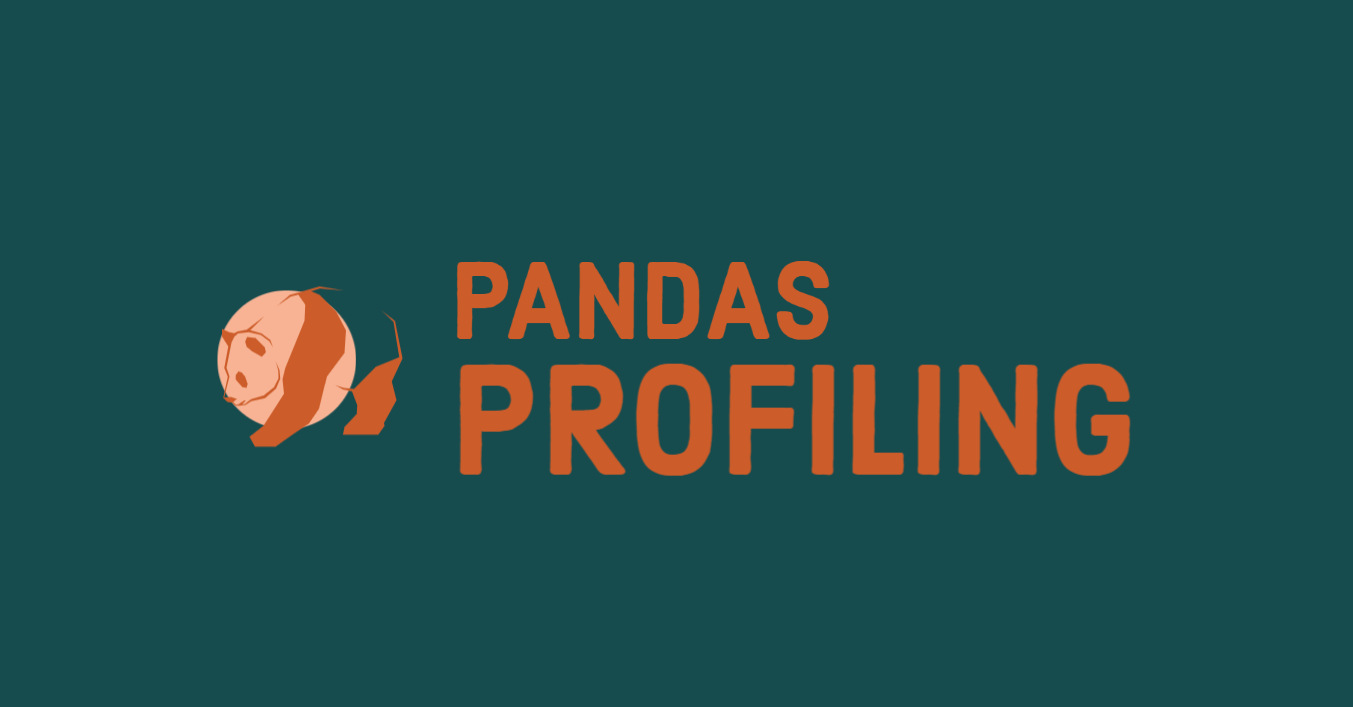

# MLB Player Digital Engagement Forecasting

## Problem Statement

In this competition, we need to `predict how fans engage with MLB players’ digital content on a daily basis for a future date range`. We’ll have access to player performance data, social media data, and team factors like market size. Successful models will provide new insights into what signals most strongly correlate with and influence engagement. We are tasked with `forecasting four different measures of engagement (target1 - target4)` for a subset of MLB players who are active in the 2021 season.

<hr>

## Data Understanding

* `players.csv` - Library containing high level information about all MLB players.
* `teams.csv` - Library containing high level information about all MLB teams.
* `seasons.csv` - Information about start and end dates of all seasons in this dataset.
* `awards.csv` - A collection of awards given out prior to 01/01/2018 (the first date in train.csv).
* `train.csv` - the training set.
* `example_test.csv` - an example in the form of the test set that we'll be evaluated on.
* `example_sample_submission.csv` - A sample submission file in the correct format based on the example test set.

<hr>

## Exploratory Data Analysis using Pandas Profiling

<div class="alert alert-success">
The aim of this notebook is to show how we can use Pandas Profiling for Exploratory Data Analysis of a dataset.<br>
This can be very useful for analyzing the data quickly and getting helful insights.<br>
</div>

`We're going to see different ways of using Pandas Profiling through Classes and Functions.`

* [Classes](#section-one)
* [Functions](#section-two)
* [Condensed Code](#section-three)

<hr>

## Pandas Profiling

`Pandas Profiling` can be used to generate reports from a pandas `DataFrame`.

`df.describe()` function in pandas provides some basic data analysis whereas `pandas_profiling` extends the pandas DataFrame with `df.profile_report()` for quick and better data analysis

For each column the following statistics are presented in an interactive HTML report:

* `Type inference` - detect the types of columns in a dataframe.
* `Essentials` - type, unique values, missing values
* `Quantile statistics` like minimum value, Q1, median, Q3, maximum, range, interquartile range
* `Descriptive statistics` like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* `Most frequent values`
* `Histogram`
* `Correlations` highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
* `Missing values` matrix, count, heatmap and dendrogram of missing values
* `Text analysis` learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.
* `File and Image analysis` extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.

You can check out the URL for more information: https://github.com/pandas-profiling/pandas-profiling

<hr>

### Importing the required libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
# Exploratory Data Analysis
import pandas_profiling
# To generate reports from a Dataset stored as a pandas DataFrame.
from pandas_profiling import ProfileReport

### Defining variables for storing the dataset names and their path

In [ ]:
INPUT_PATH = '../input/mlb-player-digital-engagement-forecasting'
OUTPUT_PATH = '.'
PLAYERS = 'players'
TEAMS = 'teams'
AWARDS = 'awards'
SEASONS = 'seasons'

<a id="section-one"></a>
# Class for Exploratory Data Analysis using Pandas Profiling

In [ ]:
class PandasProfile:
    def __init__(self, file_name):
        self.file_name = file_name
        self.input_file = INPUT_PATH + '/' + file_name + '.csv';
        self.output_file = OUTPUT_PATH + '/' + file_name + '.html';
        
    def import_file(self, max_sample = None):
        if(max_sample is not None):
            df = pd.read_csv(self.input_file, nrows = max_sample)
        else:
            df = pd.read_csv(self.input_file)
        return df

    def create_pandas_profile(self, dataframe):
        profile = ProfileReport(dataframe, title='Data Analysis Report for {}'.format(self.file_name), html={'style':{'full_width':True}})
        return profile
    
    def display_data_profile(self, pandas_profile):
        pandas_profile.to_notebook_iframe()
        
    def export_data_profile(self, pandas_profile):
        pandas_profile.to_file(output_file = self.output_file)
        
    def complete_profile(self, max_sample = None):
        df = self.import_file(max_sample)
        pandas_profile = self.create_pandas_profile(df)
        self.export_data_profile(pandas_profile)
        self.display_data_profile(pandas_profile)

### Creating the data reports using the user-defined Class `PandasProfile`

In [ ]:
players_profile = PandasProfile(PLAYERS)
players_profile.complete_profile()

### Similarly profile can be created for Seasons, Teams and Awards using:
* `seasons_profile = PandasProfile(SEASONS)`<br>
* `teams_profile = PandasProfile(TEAMS)`

<hr>

<a id="section-two"></a>
# Modular functions for EDA using Pandas Profiling

### Reads the dataset from the csv file and returns it

In [ ]:
def import_file(file_path, max_sample = None):
    if(max_sample is not None):
        df = pd.read_csv(file_path, nrows = max_sample)
    else:
        df = pd.read_csv(file_path)
    return df

### Created the pandas profile from the dataframe

In [ ]:
def create_pandas_profile(dataframe):
    profile = ProfileReport(dataframe, title='Data Analysis Report', html={'style':{'full_width':True}})
    return profile

### Displays the data analysis report in the notebook

In [ ]:
def display_data_profile(pandas_profile):
    pandas_profile.to_notebook_iframe()

### Exports the data analysis report as an interactive html

In [ ]:
def export_data_profile(pandas_profile, export_path = './Report.html'):
    pandas_profile.to_file(output_file = export_path)

### Complete profiling to handle everything in one function :
* Reads the data from csv files
* Creates pandas profile from the dataframe
* Exports the data analysis report as an interactive html
* Displays the data analysis report in the notebook

In [ ]:
def complete_profile(data_file_path, html_export_path = './Report.html') :
    file_path = data_file_path
    df = import_file(file_path)
    pandas_profile = create_pandas_profile(df)
    export_data_profile(pandas_profile, export_path = html_export_path)
    display_data_profile(pandas_profile)

### Creating the data reports using the user-defined functions

In [ ]:
complete_profile('../input/mlb-player-digital-engagement-forecasting/teams.csv', 'Teams.html')

### Similarly we can use it to create EDA reports for other datasets as well:
* `complete_profile('../input/mlb-player-digital-engagement-forecasting/players.csv', 'Players.html')`
* `complete_profile('../input/mlb-player-digital-engagement-forecasting/seasons.csv', 'Seasons.html')`

<hr>

<a id="section-three"></a>
# Condensed code for EDA using Pandas Profile

In [ ]:
# Read the data from csv file
dataframe = pd.read_csv('../input/mlb-player-digital-engagement-forecasting/seasons.csv')
# Creates a pandas data profile
pandas_profile = ProfileReport(dataframe, title='Data Analysis Report for Seasons', html={'style':{'full_width':True}})
# Export the data analysis report to an interactive HTML
pandas_profile.to_file(output_file = 'Seasons.html')
# Displays the data analysis report in the notebook
pandas_profile.to_notebook_iframe()

<hr>

### Creating data analysis report for Awards using user-defined `PandasProfile` Class

In [ ]:
awards_profile = PandasProfile(AWARDS)
awards_profile.complete_profile()